In [1]:
from MO_analyzer import GroundState
from spectra_tools import plot_spectrum
import numpy as np
import pandas as pd
from spectra_tools import spectrum_boardening
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white", font_scale=3)

In [2]:
filename = 'dummy_DOS.log'
MO_comp = GroundState(filename,ghf=False,MOdtype='real')
MO_comp.parseMOs()
MO_comp.parseOverlaps()

NUM_OF_SPACICAL_BASIS=375, NUM_OF_ELECTRONS=130
MO Coefficients and AOTypes have been Obtained
 *** Overlap ***  has been obtained


## define your own groups for plotting partial DOS

thru `selected_atoms_groups`, which is a dict of defined groups:

    key: as a defined label 
    values: as an array of selected atoms 

In [3]:
Energy_range = (-50/27.2114, 10/27.2114) # in a.u.
water_atoms = [31]
result = MO_comp.gen_MOs_report(MO_list=None,E_range=Energy_range,report_detail=2,
                                selected_atoms_groups={'Water':water_atoms},return_analysis=True)
result[20]

{'MO': 53,
 'Total Projection': 1.0000058125579618,
 'Energy': -1.12056,
 'O': [0.972983087594637,
  {'S': 0.005171590130381727,
   'P': 0.9671774586483421,
   'D': 0.0006340388159130691}],
 'Al': [0.008169858637805512,
  {'S': -2.294588251876857e-09,
   'P': -0.006625738455547489,
   'D': 0.014795599387941253}],
 'H': [0.01885286632551963,
  {'S': 0.01051600712469724, 'P': 0.008336859200822394, 'D': 0.0}],
 'Water': [0.00011320383888224245,
  {'S': 1.3273911175200103e-09,
   'P': 0.00011296355978494315,
   'D': 2.38951706181771e-07}]}

In [4]:
E = [x['Energy']*27.2114 for x in result]
DOS_total   = np.array([x['Total Projection'] for x in result])
DOS_O_P     =  np.array([x['O'][1]['P'] for x in result])
DOS_Water_P =  np.array([x['Water'][1]['P'] for x in result])

Text(0.5, 0, 'Energy / eV')

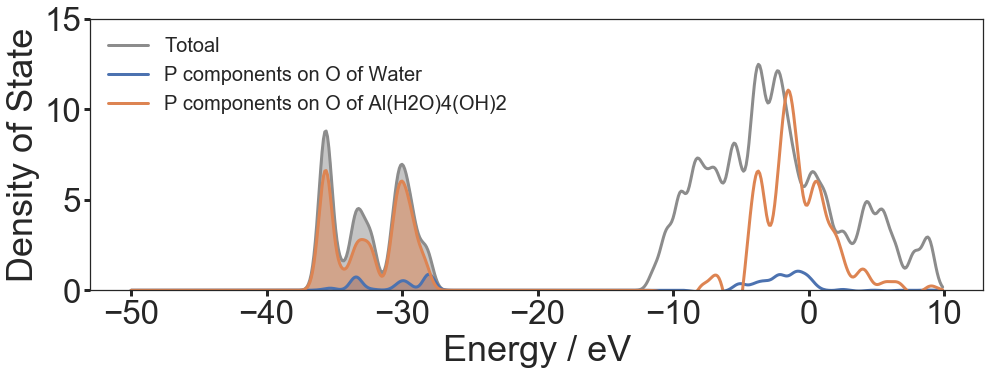

In [5]:
fig,ax=plt.subplots(figsize=(16,5))

DOS_collections = [DOS_total, DOS_Water_P, DOS_O_P-DOS_Water_P]
labels = ['Totoal', 'P components on O of Water', 
          'P components on O of Al(H2O)4(OH)2']
colors = ['C7', 'C0', 'C1']
FWHM = 1.0

HOMO = MO_comp.HOMO*27.2114 + FWHM

for i in range(3):
    plot_spectrum(E, DOS_collections[i], color=colors[i], label=labels[i], 
                  E_range=(-50,10),ax=ax, FWHM=FWHM,
                  fill_valence=True,E_HOMO=HOMO,fill_color=colors[i])

ax.legend(fontsize=20,frameon=False)
ax.tick_params(axis='both',bottom=True, left=True, width=3)
ax.set_ylim([0,15])

ax.set_ylabel('Density of State')
ax.set_xlabel('Energy / eV')